In [44]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined = pd.merge(rd, cd, on="city", how="outer")
# Display the data table for preview
#combined.head()

In [47]:
#making DFs for each city type
urban = combined[combined["type"] == "Urban"].groupby([combined["city"]])
suburban = combined[combined["type"] == "Suburban"].groupby([combined["city"]])
rural = combined[combined["type"] == "Rural"].groupby([combined["city"]])

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

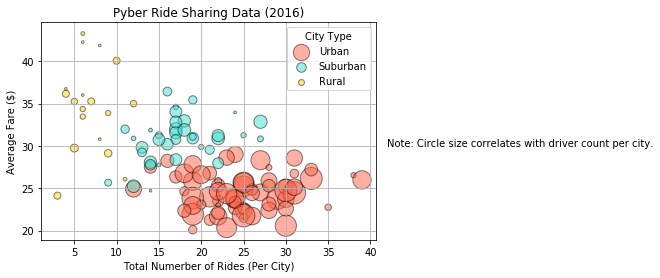

<Figure size 432x288 with 0 Axes>

In [95]:
# Obtain the x and y coordinates for each of the three city types
# x-axis = Total Numerber of Rides (Per City)
x_urban = urban["ride_id"].count()
x_suburban = suburban["ride_id"].count()
x_rural = rural["ride_id"].count()
# y-axis = Average Fare ($)
y_urban = urban["fare"].mean()
y_suburban = suburban["fare"].mean()
y_rural = rural["fare"].mean()
# Circles size correlates with driver count per city. Calcs based in driver
d_urban = urban["driver_count"].mean()
d_suburban = suburban["driver_count"].mean()
d_rural = rural["driver_count"].mean()
# Build the scatter plots for each city types
u_plot = plt.scatter(x_urban, y_urban, s=d_urban * 7, c ="tomato",
                     linewidths=1, edgecolors="black", alpha=0.5, label="Urban")
s_plot = plt.scatter(x_suburban, y_suburban, s=d_suburban * 7, c ="turquoise",
                     linewidths=1, edgecolors="black", alpha=0.5, label="Suburban")
r_plot = plt.scatter(x_rural, y_rural, s=d_rural * 7, c ="gold",
                     linewidths=1, edgecolors="black", alpha=0.5, label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Numerber of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
# Create a legend
plt.legend(handles=[u_plot,s_plot,r_plot], title="City Type", loc="best")
# Incorporate a text label regarding circle size
# Reference https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
plt.text(42,30,"Note: Circle size correlates with driver count per city.")
plt.axis("equal")
plt.show()
# Save Figure
# Reference https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("Pyber Ride Sharing Data for 2016.jpeg",dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Total Fares by City Type

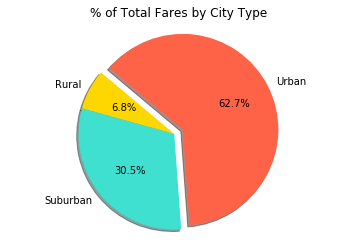

<Figure size 432x288 with 0 Axes>

In [92]:
# Calculate Type Percents
city_type = combined.groupby("type")
fares = city_type["fare"].sum()
fares
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "turquoise", "tomato"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Plot
plt.pie(fares, labels=labels, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow="true", startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()
# Save Figure
# Reference https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("% of Total Fares by City Type.jpeg",dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Total Rides by City Type

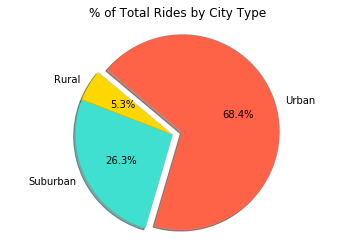

<Figure size 432x288 with 0 Axes>

In [102]:
# Calculate Ride Percents
city_type = combined.groupby("type")
rides = city_type["ride_id"].count()
rides
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "turquoise", "tomato"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(rides, labels=labels, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow="true", startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("% of Total Rides by City Type.jpeg",dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Total Drivers by City Type

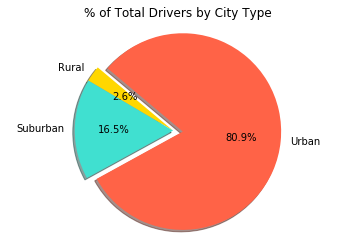

<Figure size 432x288 with 0 Axes>

In [104]:
# Calculate Driver Percents
city_type = cd.groupby("type")
driver = city_type["driver_count"].sum()
driver
# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "turquoise", "tomato"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(driver, labels=labels, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow="true", startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("% of Total Drivers by City Type.jpeg",dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)